#Problem Statement:
LoanTap aims to assess the creditworthiness of individuals applying for a Personal Loan and provide personalized loan offers. The objective is to build a data-driven underwriting model that determines whether an individual should be granted a credit line and, if approved, suggests suitable repayment terms and loan conditions. As a data scientist have to provide a solution that should focus exclusively on the underwriting process for Personal Loans and use relevant attributes to optimize decision-making, with the ultimate goal of reducing default rates and maximizing profit for LoanTap.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
df = pd.read_csv('logistic_regression.csv')
df.head()


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
df.shape

(396030, 27)

In [7]:
df.ndim

2

In [8]:
df.isnull().sum()

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


#Exploratory Data Analysis - EDA

In [9]:
df['loan_status'].value_counts()

,count
loan_status,
Fully Paid,318357
Charged Off,77673


In [10]:
df_fp = df[df['loan_status'] == 'Fully Paid'].count().sum()
df_co = df[df['loan_status'] == 'Charged Off'].count().sum()

In [11]:
df_fp, df_co

(8531059, 2080161)

In [12]:
Total_Loans=df_fp+df_co

In [13]:
Percentage_fp=( df_fp / Total_Loans ) * 100
Percentage_fp

80.39658964756174

In [14]:
Percentage_co=( df_co / Total_Loans ) * 100
Percentage_co

19.60341035243827

In [15]:
percentage_df = pd.DataFrame({
    'Loan Status': ['Fully Paid', 'Charged Off'],
    'Percentage': [Percentage_fp, Percentage_co]
})
percentage_df

,Loan Status,Percentage
0,Fully Paid,80.39659
1,Charged Off,19.60341


In [16]:
round(100*(df.isnull().sum()/len(df.index)), 2)

,0
loan_amnt,0.00
term,0.00
int_rate,0.00
installment,0.00
grade,0.00
sub_grade,0.00
emp_title,5.79
emp_length,4.62
home_ownership,0.00
annual_inc,0.00


In [17]:
df['loan_status'].describe()

,loan_status
count,396030
unique,2
top,Fully Paid
freq,318357


<Axes: xlabel='count', ylabel='loan_status'>

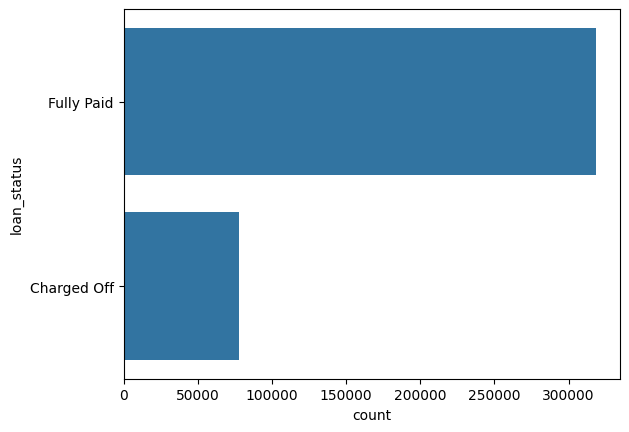

In [18]:
sns.countplot(df['loan_status'])

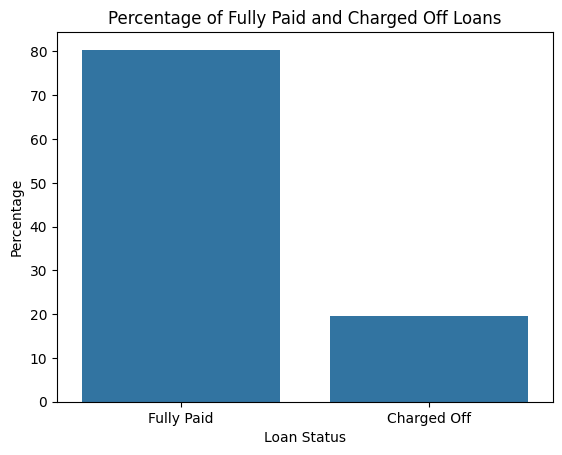

In [19]:
sns.barplot(x='Loan Status', y='Percentage', data=percentage_df)

# Add labels and title
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.title('Percentage of Fully Paid and Charged Off Loans')

# Show the plot
plt.show()

In [20]:
df['grade'].value_counts()

,count
grade,
B,116018
C,105987
A,64187
D,63524
E,31488
F,11772
G,3054


In [21]:
cols = df.columns
cols

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [22]:
col_num = df._get_numeric_data().columns
col_num

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [23]:
col_num = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
           'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
           'mort_acc', 'pub_rec_bankruptcies']
len(col_num)

12

#### Correlation Heatmap -

A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column. The color of the cell is proportional to the number of measurements that match the dimensional value. This makes correlation heatmaps ideal for data analysis since it makes patterns easily readable and highlights the differences and variation in the same data. A correlation heatmap, like a regular heatmap, is assisted by a colorbar making data easily readable and comprehensible.

In [25]:
num_df = df[col_num]
num_df.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0


In [26]:
cor = num_df.corr(method = 'pearson')
cor

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


<Axes: >

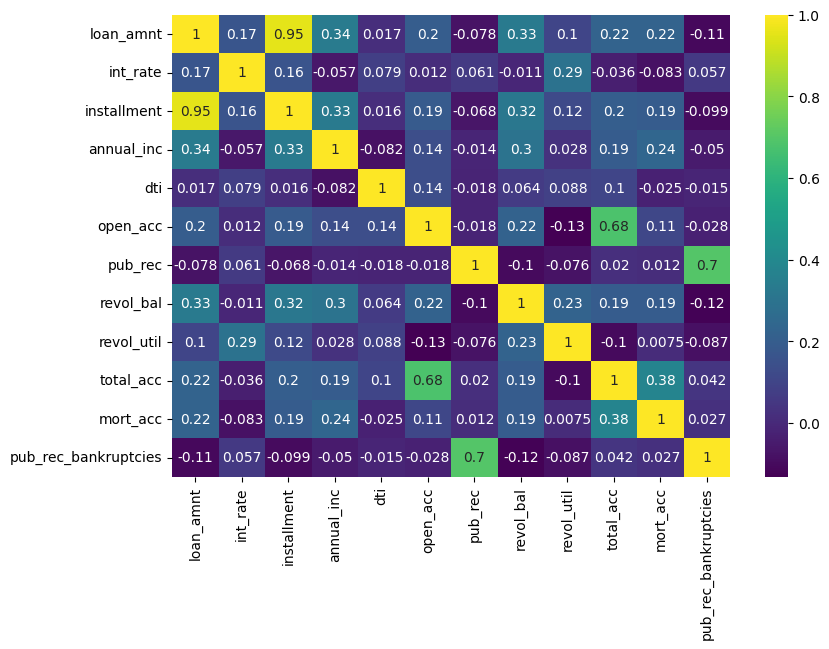

In [27]:
plt.figure(figsize=(9,6))
sns.heatmap(cor, annot=True, cmap='viridis')

We noticed almost perfect correlation between "loan_amnt" the "installment" feature.

- installment: The monthly payment owed by the borrower if the loan originates.
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

In [28]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
OTHER,112
NONE,31
ANY,3


Combining minority values as Other

In [29]:
df.loc[df['home_ownership'] == 'NONE', 'home_ownership'] = 'Other'
df.loc[df['home_ownership'] == 'ANY', 'home_ownership'] = 'Other'
df.loc[df['home_ownership'] == 'OTHER', 'home_ownership'] = 'Other'


In [30]:
df['home_ownership'].value_counts()

,count
home_ownership,
MORTGAGE,198348
RENT,159790
OWN,37746
Other,146


In [31]:
#checking the distribution of others
df.loc[df['home_ownership'] == 'Other', 'loan_status'].value_counts()

,count
loan_status,
Fully Paid,123
Charged Off,23


In [32]:
df_loan_HO = df.groupby('home_ownership')['loan_status'].value_counts(normalize=True)
df_loan_HO

home_ownership  loan_status
MORTGAGE        Fully Paid     0.830439
                Charged Off    0.169561
OWN             Fully Paid     0.793197
                Charged Off    0.206803
Other           Fully Paid     0.842466
                Charged Off    0.157534
RENT            Fully Paid     0.773378
                Charged Off    0.226622
Name: proportion, dtype: float64

<Axes: xlabel='home_ownership'>

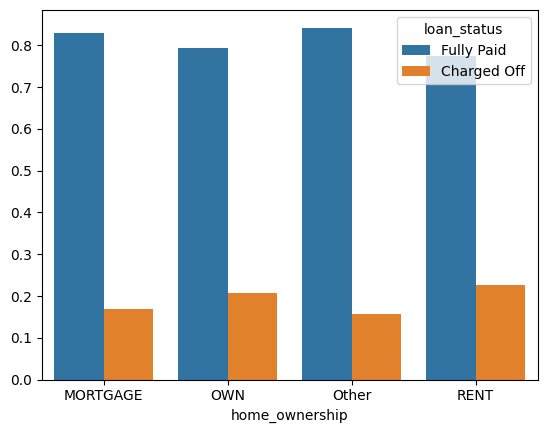

In [33]:
sns.barplot(x=df_loan_HO.index.get_level_values(0), y=df_loan_HO.values, hue=df_loan_HO.index.get_level_values(1))

In [34]:
df_loan_grade = df.groupby('grade')['loan_status'].value_counts(normalize=True)
df_loan_grade

grade  loan_status
A      Fully Paid     0.937121
       Charged Off    0.062879
B      Fully Paid     0.874270
       Charged Off    0.125730
C      Fully Paid     0.788191
       Charged Off    0.211809
D      Fully Paid     0.711322
       Charged Off    0.288678
E      Fully Paid     0.626366
       Charged Off    0.373634
F      Fully Paid     0.572120
       Charged Off    0.427880
G      Fully Paid     0.521611
       Charged Off    0.478389
Name: proportion, dtype: float64

<Axes: xlabel='grade'>

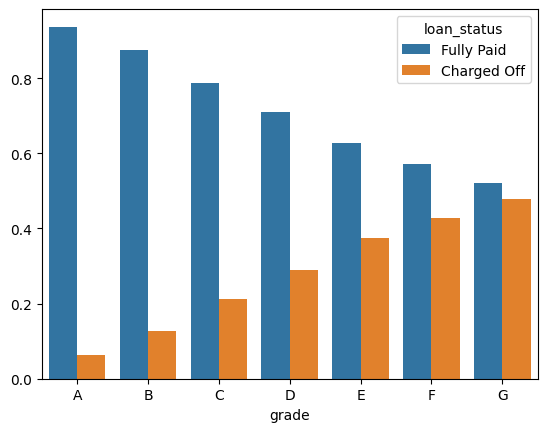

In [35]:
sns.barplot(x=df_loan_grade.index.get_level_values(0), y=df_loan_grade.values, hue=df_loan_grade.index.get_level_values(1))

In [37]:
titles = df['emp_title'].value_counts()[:30]

#Visualization

Manager and Teachers and most affordable loan job titles.

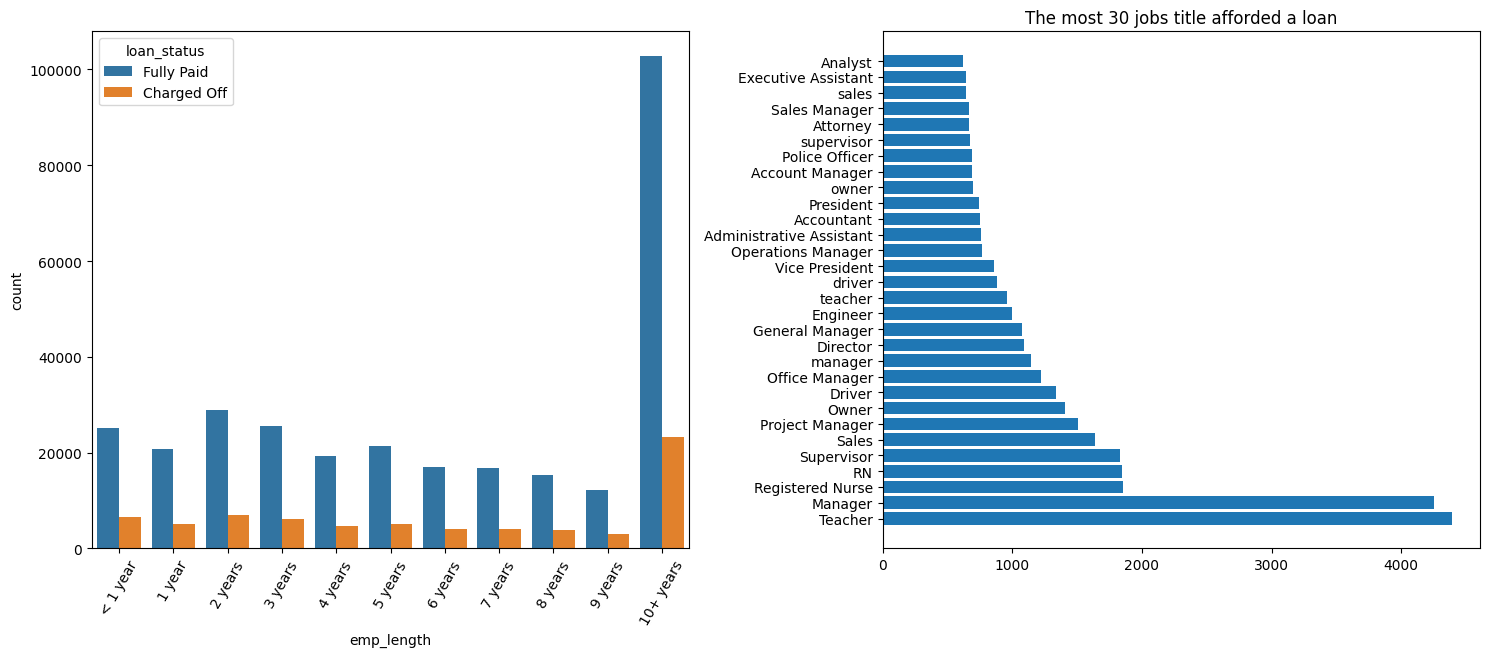

In [38]:
plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
year = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=df, hue='loan_status', order=year)
g.set_xticklabels(g.get_xticklabels(), rotation=60);

plt.subplot(2, 2, 2)
plt.barh(df.emp_title.value_counts()[:30].index, df.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

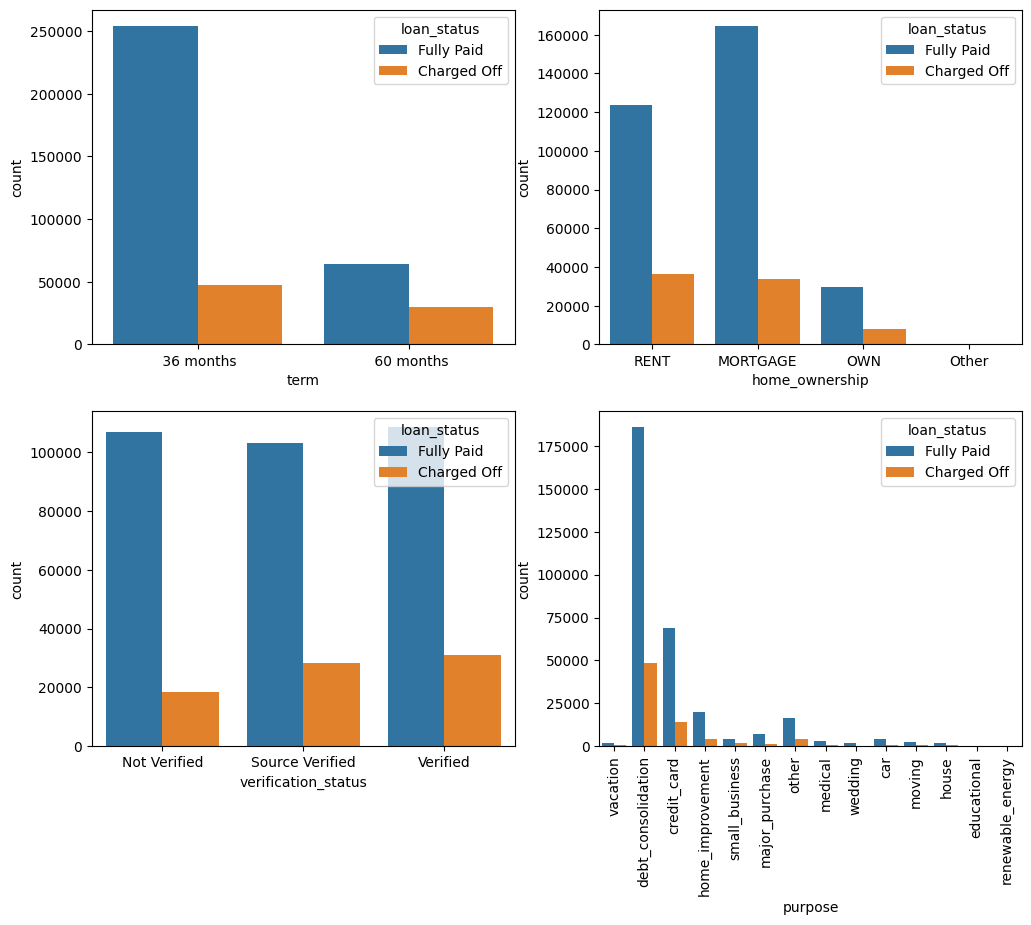

In [39]:
plt.figure(figsize=(12, 20))

plt.subplot(4, 2, 1)
sns.countplot(x='term', data=df, hue='loan_status')

plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=df, hue='loan_status')

plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=df, hue='loan_status')

plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=df, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

#Feature Engineering

In [40]:
def pub_rec(num):
  if num == 0.0:
    return 0
  else:
    return 1

def mort_acc(num):
  if num == 0.0:
    return 0
  else:
    return 1

def pub_rec_bankruptcies(num):
  if num == 0.0:
    return 0
  else:
    return 1

In [41]:
df['pub_rec'] = df['pub_rec'].apply(pub_rec)
df['mort_acc'] = df['mort_acc'].apply(mort_acc)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].apply(pub_rec_bankruptcies)

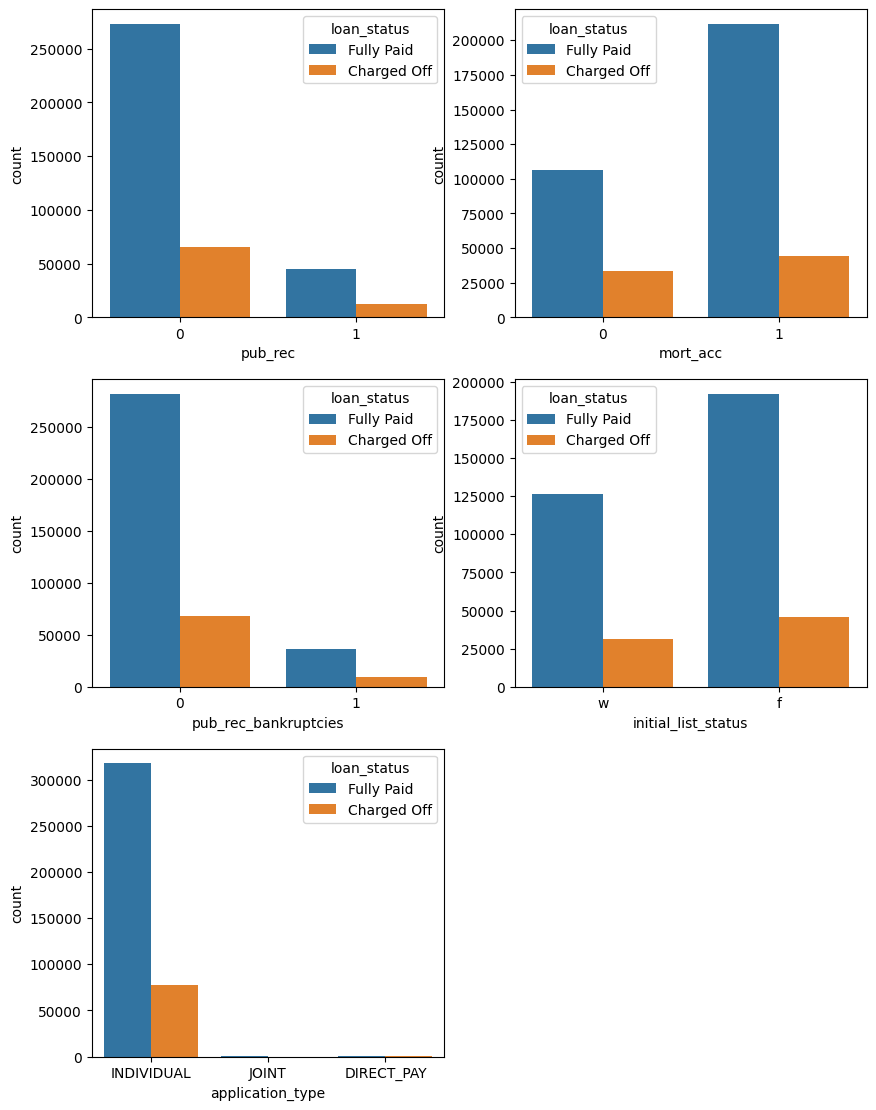

In [42]:
plt.figure(figsize=(10,28))

plt.subplot(6,2,1)
sns.countplot(x='pub_rec', data=df, hue='loan_status')

plt.subplot(6,2,2)
sns.countplot(x='mort_acc', data=df, hue='loan_status')

plt.subplot(6,2,3)
sns.countplot(x='pub_rec_bankruptcies', data=df, hue='loan_status')


plt.subplot(6,2,4)
sns.countplot(x='initial_list_status', data=df, hue='loan_status')


plt.subplot(6,2,5)
sns.countplot(x='application_type', data=df, hue='loan_status')
plt.show()

In [43]:
# Mapping of target variable -
df['loan_status'] = df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [44]:
df.isnull().sum()/len(df)*100

,0
loan_amnt,0.000000
term,0.000000
int_rate,0.000000
installment,0.000000
grade,0.000000
sub_grade,0.000000
emp_title,5.789208
emp_length,4.621115
home_ownership,0.000000
annual_inc,0.000000


#Handling Outliers - Plotting Box Plots for Numerical Variables

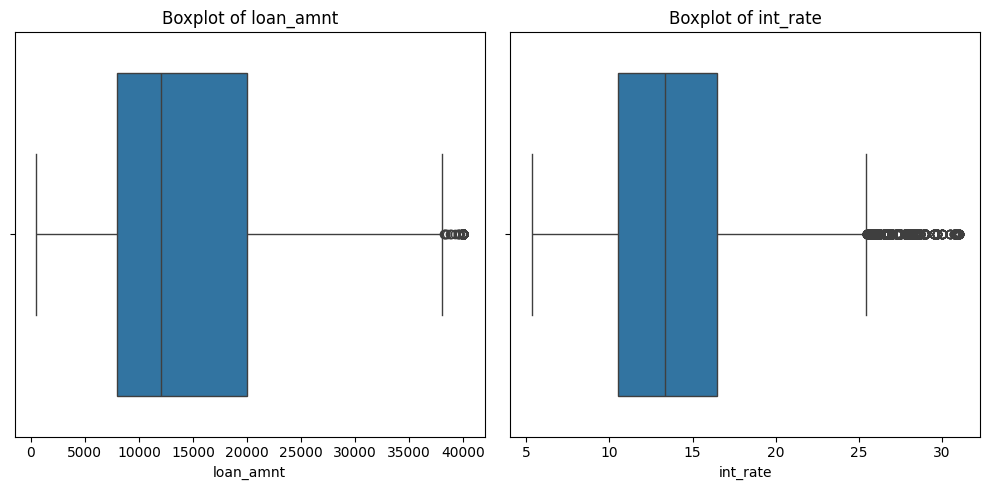

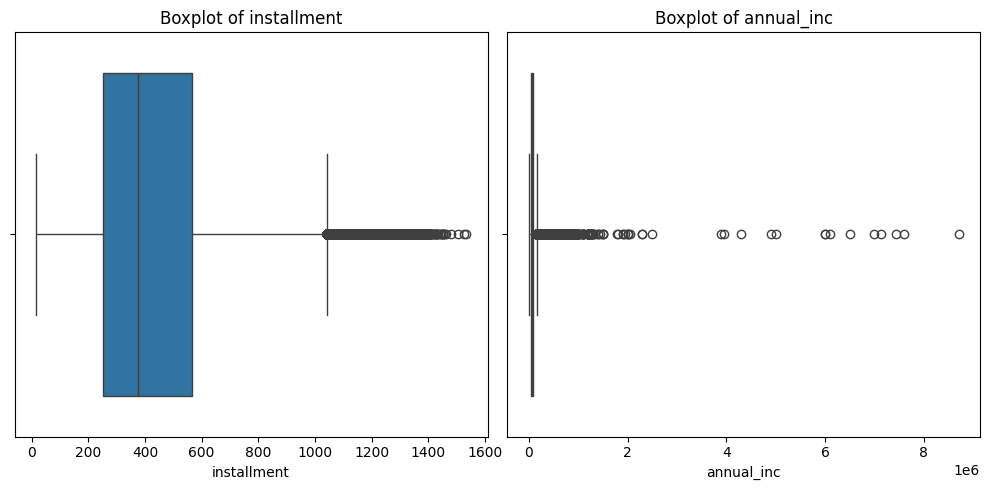

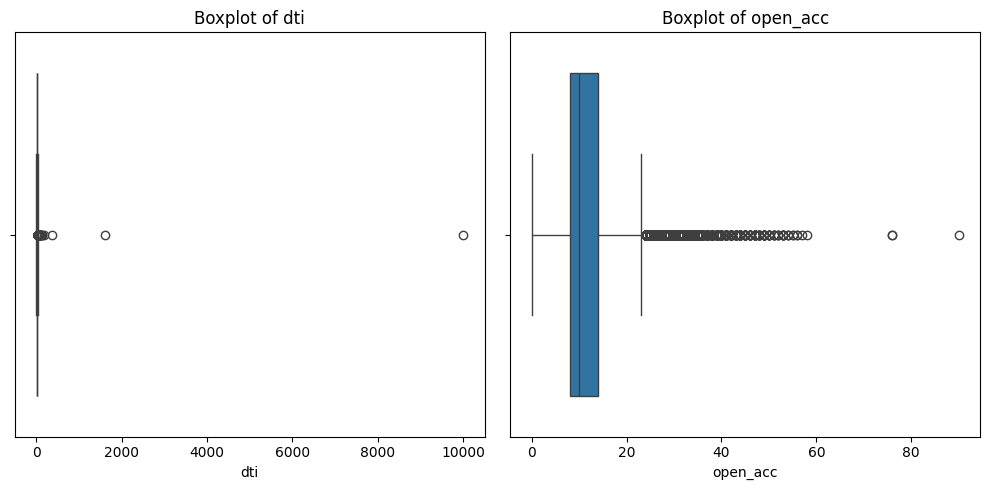

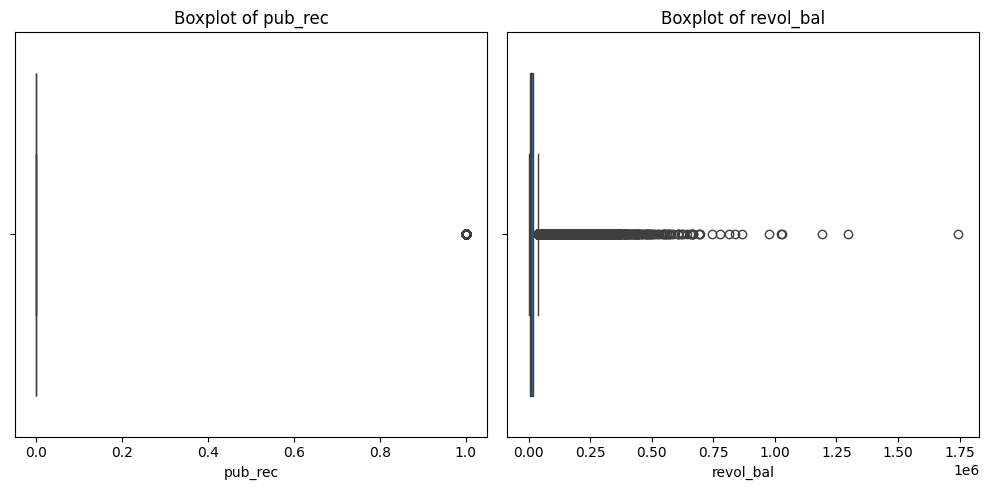

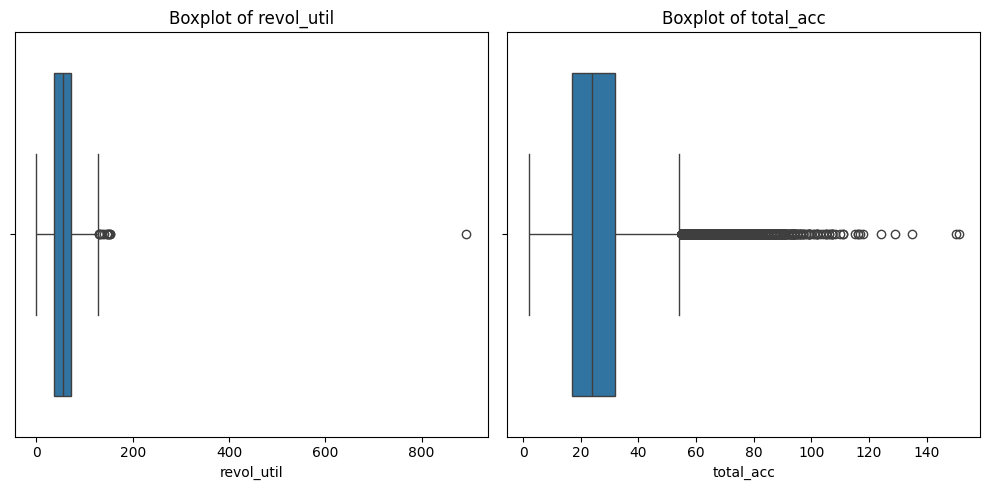

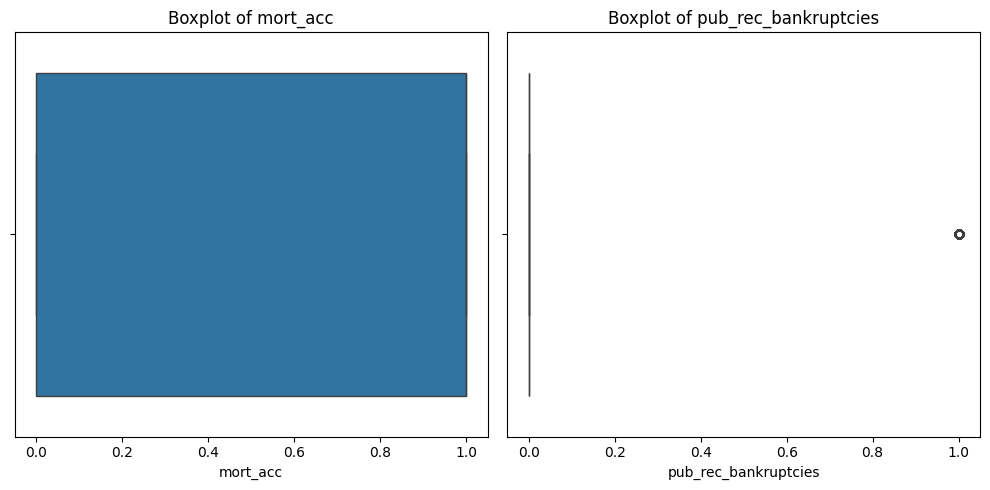

In [45]:
for i in range(0, len(col_num), 2):
    plt.figure(figsize=(10, 5))  # Set the figure size

    # Plot the first graph in the pair
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[col_num[i]])
    plt.title(f'Boxplot of {col_num[i]}')
    plt.xlabel(col_num[i])

    # Check if there is a second graph in the pair
    if i + 1 < len(col_num):
        # Plot the second graph in the pair
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col_num[i + 1]])
        plt.title(f'Boxplot of {col_num[i + 1]}')
        plt.xlabel(col_num[i + 1])

    # Display the plots side by side
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

In [46]:
#Handling outliers for each of numerical columsn
#IQR = Q3 - Q1
IQR_loan_amnt = df['loan_amnt'].quantile(0.75) - df['loan_amnt'].quantile(0.25)
IQR_int_rate = df['int_rate'].quantile(0.75) - df['int_rate'].quantile(0.25)
IQR_installment = df['installment'].quantile(0.75) - df['installment'].quantile(0.25)
IQR_annual_inc = df['annual_inc'].quantile(0.75) - df['annual_inc'].quantile(0.25)
IQR_open_acc = df['open_acc'].quantile(0.75) - df['open_acc'].quantile(0.25)

In [47]:
#removing outliers from dataset
df = df[df['loan_amnt'] < (df['loan_amnt'].quantile(0.75) + 1.5 * IQR_loan_amnt)]



In [48]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,1,0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [49]:
df.shape

(395836, 27)

In [51]:
df = df[df['annual_inc'] < (df['annual_inc'].quantile(0.75) + 1.5 * IQR_int_rate)]

In [52]:
df.shape

(233326, 27)

#Data Preprocessing

In [103]:
df['term'].value_counts()

,count
term,
36,185750
60,47576


In [104]:
df['term'].unique()

array([36, 60])

In [105]:
term_mapping = {' 36 months': 36, ' 60 months': 60}
df['term'] = df['term'].map(term_mapping)

In [106]:
df['term'].value_counts()

,count
term,


In [57]:
list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df['initial_list_status'].map(list_status)


In [59]:
# Dropping some variables which IMO we can let go for now -
df.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'],
                   axis=1, inplace=True)

One Hot Encoding

In [107]:
dummies = ['purpose', 'grade', 'verification_status', 'application_type', 'home_ownership']
df = pd.get_dummies(df, columns=dummies, drop_first=True)

KeyError: "None of [Index(['purpose', 'grade', 'verification_status', 'application_type',\n       'home_ownership'],\n      dtype='object')] are in the [columns]"

In [62]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OWN,home_ownership_Other,home_ownership_RENT
1,8000.0,36,11.99,265.68,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,1,1,0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,1,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True
3,7200.0,36,6.49,220.65,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,1,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,24375.0,60,17.27,609.33,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,1,1,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,False
7,13000.0,36,11.14,426.47,46000.0,0,26.87,11.0,0,13425.0,64.5,15.0,1,0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True


In [63]:
df.shape

(233326, 41)

Data Preparation for Modeling

In [64]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [65]:
X.drop(['revol_util'], axis=1, inplace=True)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    stratify=y, random_state=42)

In [69]:
print(X_train.shape)
print(X_test.shape)

(163328, 39)
(69998, 39)


#### MinMaxScaler -

For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.

MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully change the information embedded in the original data.

In [70]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [71]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [72]:
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.782


#Confusion Matrix

In [73]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[53644   917]
 [14366  1071]]


#Classifiction Report

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88     54561
           1       0.54      0.07      0.12     15437

    accuracy                           0.78     69998
   macro avg       0.66      0.53      0.50     69998
weighted avg       0.73      0.78      0.71     69998



#### ROC Curve -

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

- True Positive Rate
- False Positive Rate

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

- TPR=(TP)/(TP+FN)

False Positive Rate (FPR) is defined as follows:

- FPR=(FP)/(FP+TN)

An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

#### AUC (Area under the ROC Curve) -

AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).


AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions:

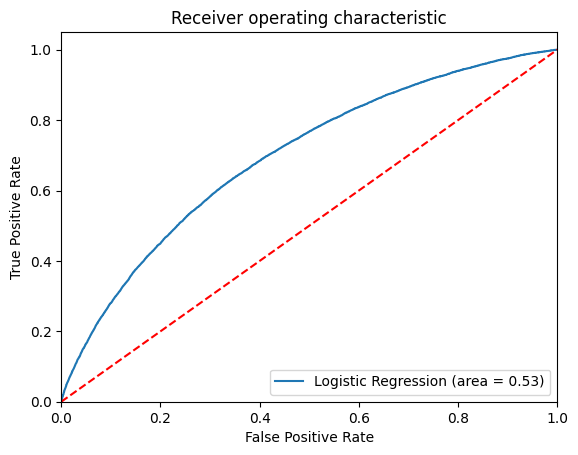

In [75]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

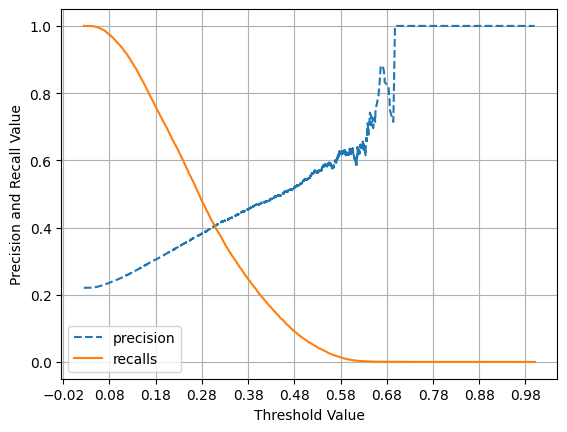

In [76]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, logreg.predict_proba(X_test)[:,1])

### Multicollinearity check using Variance Inflation Factor (VIF) -

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

Multicollinearity can be detected via various methods. One such method is Variance Inflation Factor aka VIF.
In VIF method, we pick each independent feature and regress it against all of the other independent features.
VIF score of an independent variable represents how well the variable is explained by other independent variables.

VIF = 1/1-R2

In [102]:
#calcualting stats model summary
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary2())

AttributeError: 'SMOTE' object has no attribute 'Logit'

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
  # Select only numeric columns
  X = X.select_dtypes(include=[np.number])

  # Drop rows with NaN or infinite values
  X = X.replace([np.inf, -np.inf], np.nan).dropna()

  # Calculating VIF for each feature
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif


In [79]:
calc_vif(X)[:5]

,variables,VIF
0,loan_amnt,112.667367
1,term,49.153846
2,int_rate,21.649172
3,installment,106.961580
4,annual_inc,15.811693


In [80]:
X.drop(columns=['loan_amnt'], axis=1, inplace=True)
calc_vif(X)[:5]

,variables,VIF
0,term,19.945287
1,int_rate,13.553463
2,installment,6.212875
3,annual_inc,14.125814
4,dti,1.718673


In [81]:
X.drop(columns=['int_rate'], axis=1, inplace=True)
calc_vif(X)[:5]

,variables,VIF
0,term,11.649519
1,installment,6.043133
2,annual_inc,14.124083
3,dti,1.707509
4,open_acc,10.708991


In [82]:
X.drop(columns=['open_acc'], axis=1, inplace=True)
calc_vif(X)[:5]

,variables,VIF
0,term,11.361920
1,installment,6.041496
2,annual_inc,13.978612
3,dti,1.697891
4,pub_rec,5.590086


In [83]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
X = scaler.fit_transform(X)

kfold = KFold(n_splits=5)
accuracy = np.mean(cross_val_score(logreg, X, y, cv=kfold, scoring='accuracy', n_jobs=-1))
print("Cross Validation accuracy: {:.3f}".format(accuracy))

Cross Validation accuracy: 0.781


#Oversampling SMOTE

In [84]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [85]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (254618, 39)
After OverSampling, the shape of train_y: (254618,) 

After OverSampling, counts of label '1': 127309
After OverSampling, counts of label '0': 127309


In [86]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test)

# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.64      0.73     54561
           1       0.34      0.65      0.44     15437

    accuracy                           0.64     69998
   macro avg       0.60      0.64      0.59     69998
weighted avg       0.75      0.64      0.67     69998



In [87]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
  precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

  threshold_boundary = thresholds.shape[0]
  # plot precision
  plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
  # plot recall
  plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

  start, end = plt.xlim()
  plt.xticks(np.round(np.arange(start, end, 0.1), 2))

  plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
  plt.legend(); plt.grid()
  plt.show()



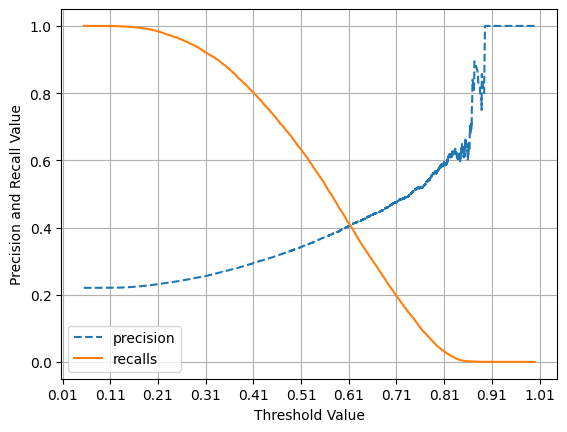

In [88]:
precision_recall_curve_plot(y_test, lr1.predict_proba(X_test)[:,1])

In [108]:
#using PCA for dimensionality reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=39)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [109]:
X_train_pca

array([[-5.57738651e-01,  2.77908527e-01,  2.90564287e-01, ...,
        -6.20225561e-04,  7.14462685e-03,  9.58321213e-04],
       [-1.33731612e-01,  4.56835998e-01, -8.18221914e-01, ...,
        -4.30747662e-04,  1.86033955e-02, -3.28777091e-04],
       [ 7.91567212e-01, -1.65562096e-01, -2.58590583e-01, ...,
         4.13325270e-04,  2.31692609e-03,  5.24578322e-04],
       ...,
       [ 8.50648417e-01,  7.73680475e-01,  4.74111805e-01, ...,
         6.37765711e-04,  2.23783415e-02, -8.12284208e-04],
       [ 4.48640991e-01,  1.77302442e-01, -5.83002791e-01, ...,
         5.50291442e-04, -1.83503802e-03, -1.06282281e-03],
       [ 1.06094880e-01,  1.08822951e-01,  8.64553031e-01, ...,
         1.30137707e-03, -1.26838748e-03, -7.82469418e-03]])

In [110]:
X_test_pca = pca.transform(X_test)

In [111]:
X_test_pca

array([[-6.02103512e-01, -3.89202926e-02,  2.62349904e-01, ...,
        -6.11172227e-04,  2.07410486e-03,  1.16442094e-02],
       [ 5.86756768e-01,  4.98859904e-01, -9.63087436e-01, ...,
        -4.69771102e-04, -1.87650198e-02,  2.71679930e-03],
       [-1.83820204e-01, -6.38598747e-02, -7.44389160e-01, ...,
        -5.82437942e-04,  2.10897739e-02,  3.59422748e-03],
       ...,
       [ 1.63513518e-01, -9.55144556e-01, -1.63106675e-01, ...,
        -1.26879623e-04,  1.67961488e-03, -8.27526195e-04],
       [-5.62217299e-01, -8.23683993e-01, -2.96250335e-02, ...,
        -1.23366784e-03,  6.29767023e-03,  1.87316545e-04],
       [ 7.26052878e-01,  3.83671869e-01,  3.48502995e-02, ...,
         7.71550977e-04,  4.55968553e-03,  2.70143857e-03]])

In [112]:
#finding VIF of features after PCA
calc_vif(pd.DataFrame(X_train_pca))[:5]

,variables,VIF
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0


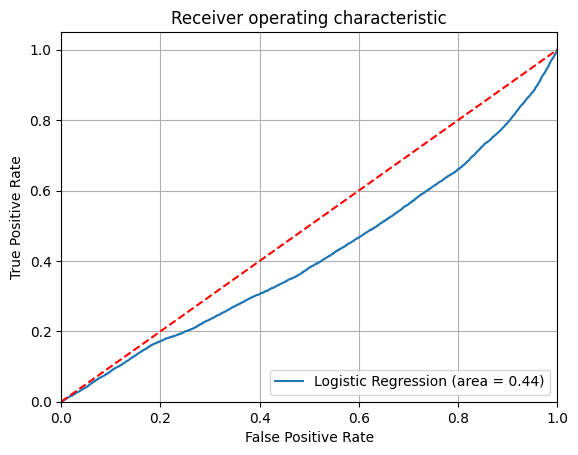

In [114]:
#Plotting AUC-ROC curve after PCA
logit_roc_auc = roc_auc_score(y_test, lr1.predict(X_test_pca))
fpr, tpr, thresholds = roc_curve(y_test, lr1.predict_proba(X_test_pca)[:,1])
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.grid()
plt.show()
